# Linear Discriminant Analysis (LDA)

The PCA can be viewed as a dimensionality reduction scheme, projecting onto the directions with maximal variance.

LDA is also a dimensionality reduction scheme but operates on a very different principle. Now we are given data that belongs to different classes. We are given both the data value $x$ and a class label $y$ If we have $k$ classes then $y$ will take on $k$ labels, in Python typicall the values 0 through $k-1$. 

The idea is to project the data onto a lower dimensional space in such a way that maximal *class separation* is achieved in the lower dimensional space.

You can learn more about the scikit-learn implementation at http://scikit-learn.org/stable/modules/generated/sklearn.lda.LDA.html

You will investigate the difference between  PCA using the wine data set, for more information see  http://archive.ics.uci.edu/ml/datasets/Wine Since the wine dataset is 13 dimensional the difference between PCA and LDA is more pronounced than say, with the Iris data set. 

We project down to 2 dimensions for easy visualization. In fact, since there are only 3 classes, one does not retain any more information by using higher dimensions.


## Import packages

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pylab as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Import different modules for using with the notebook
from IPython.display import display
from IPython.display import Image

## Loading the data

Read the data, extract the class labels from the last column, then extract the names of the classes using the convenient `set` function in Python. 


In [3]:
# import training data
wine_train = np.loadtxt('./data/wine/wine_train.txt',delimiter = ',')
wine_train_labels = wine_train[:,-1]
wine_train_classes = list(set(wine_train_labels))
wine_train_classes = np.array(wine_train_classes, dtype=int)
wine_train_labels = np.array(wine_train_labels, dtype = int)
wine_train = wine_train[:,:-1]

# import testing data
wine_test = np.loadtxt('./data/wine/wine_test.txt', delimiter = ',')
wine_test_labels = wine_test[:,-1]
wine_test_classes = list(set(wine_test_labels))
wine_test_classes = np.array(wine_test_classes, dtype=int)
wine_test_labels = np.array(wine_test_labels, dtype = int)
wine_test = wine_test[:, :-1]

---

## PCA

Project the data onto 2 PCA components and display the classes of the dimension-reduced data.

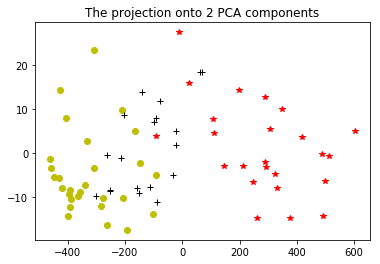

In [9]:
# fit the model on training data
pca = PCA(n_components=2)
pca.fit(wine_train)
pr_data = pca.transform(wine_test)

# Plot the 3 classes 
col = ['r*','yo','k+']
for cl in wine_test_classes:
    cl_labels = np.array([wine_test_labels==cl]).flatten()
    dat_cl = pr_data[cl_labels,:]
    plt.plot(dat_cl[:,0],dat_cl[:,1],col[int(cl-1)])
    
plt.title('The projection onto 2 PCA components')
plt.show()

## LDA

Fit an LDA model to the data, using 2 components and display the different classes of the projected data.

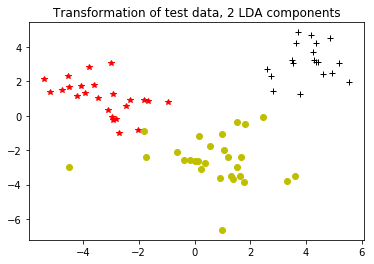

In [12]:
# Fit LDA on training data
lda = LDA(n_components=2)
lda.fit(wine_train, wine_train_labels)

# Transform training and test data
wine_train_lda = lda.transform(wine_train)
wine_test_lda = lda.transform(wine_test)


# Plot the 3 classes
col = ['r*','yo','k+']
means = np.zeros((2,3))

for cl in wine_train_classes:
    cl_labels = np.array([wine_test_labels == cl]).flatten()
    wine_cl = wine_test_lda[cl_labels, :]
    
    means[:, int(cl-1)] = np.mean(wine_cl, axis=0)
   
    plt.plot(wine_cl[:,0], wine_cl[:,1], col[int(cl-1)])

plt.title('Transformation of test data, 2 LDA components')
plt.show()

There should be no doubt that the LDA projection is much better at preserving the class structure.